In [1]:
import sys
import scipy.io as sio
import numpy as np
sys.path.append("../src")
import TopologicalAdvection as TA
import matplotlib.pyplot as plt

In [2]:
filein_contents = sio.loadmat('tau.1.05_20000pt_.01step.mat')
times = filein_contents['times'][:,0].tolist()
xin = filein_contents['x_coordinates'].tolist()
yin = filein_contents['y_coordinates'].tolist()
print("There are ", len(times), " time-steps, and ",len(xin), " potential trajectories.")

There are  2227  time-steps, and  20000  potential trajectories.


In [10]:
numtraj_vals = [5,10,20,40,80,160,320,640,1280,2560,5120,10240,20000]
#val_choice = 9
val_choice = -1
numtraj = numtraj_vals[val_choice]
traj = []
for t in range(len(times)):
    traj.append([[xin[i][t],yin[i][t]] for i in range(numtraj)])

In [11]:
num_times = 400
TopAdvec = TA.TopologicalAdvection(traj[:num_times], times[:num_times])

In [12]:
ExpandedDomain = [[TopAdvec.Domain[0][0]-0.2,TopAdvec.Domain[0][1]-0.2],[TopAdvec.Domain[1][0]+0.2,TopAdvec.Domain[1][1]+0.2]]

In [13]:

TopAdvec.SetPrintParameters(triplot = False, boundary_points = True, Bounds = ExpandedDomain)

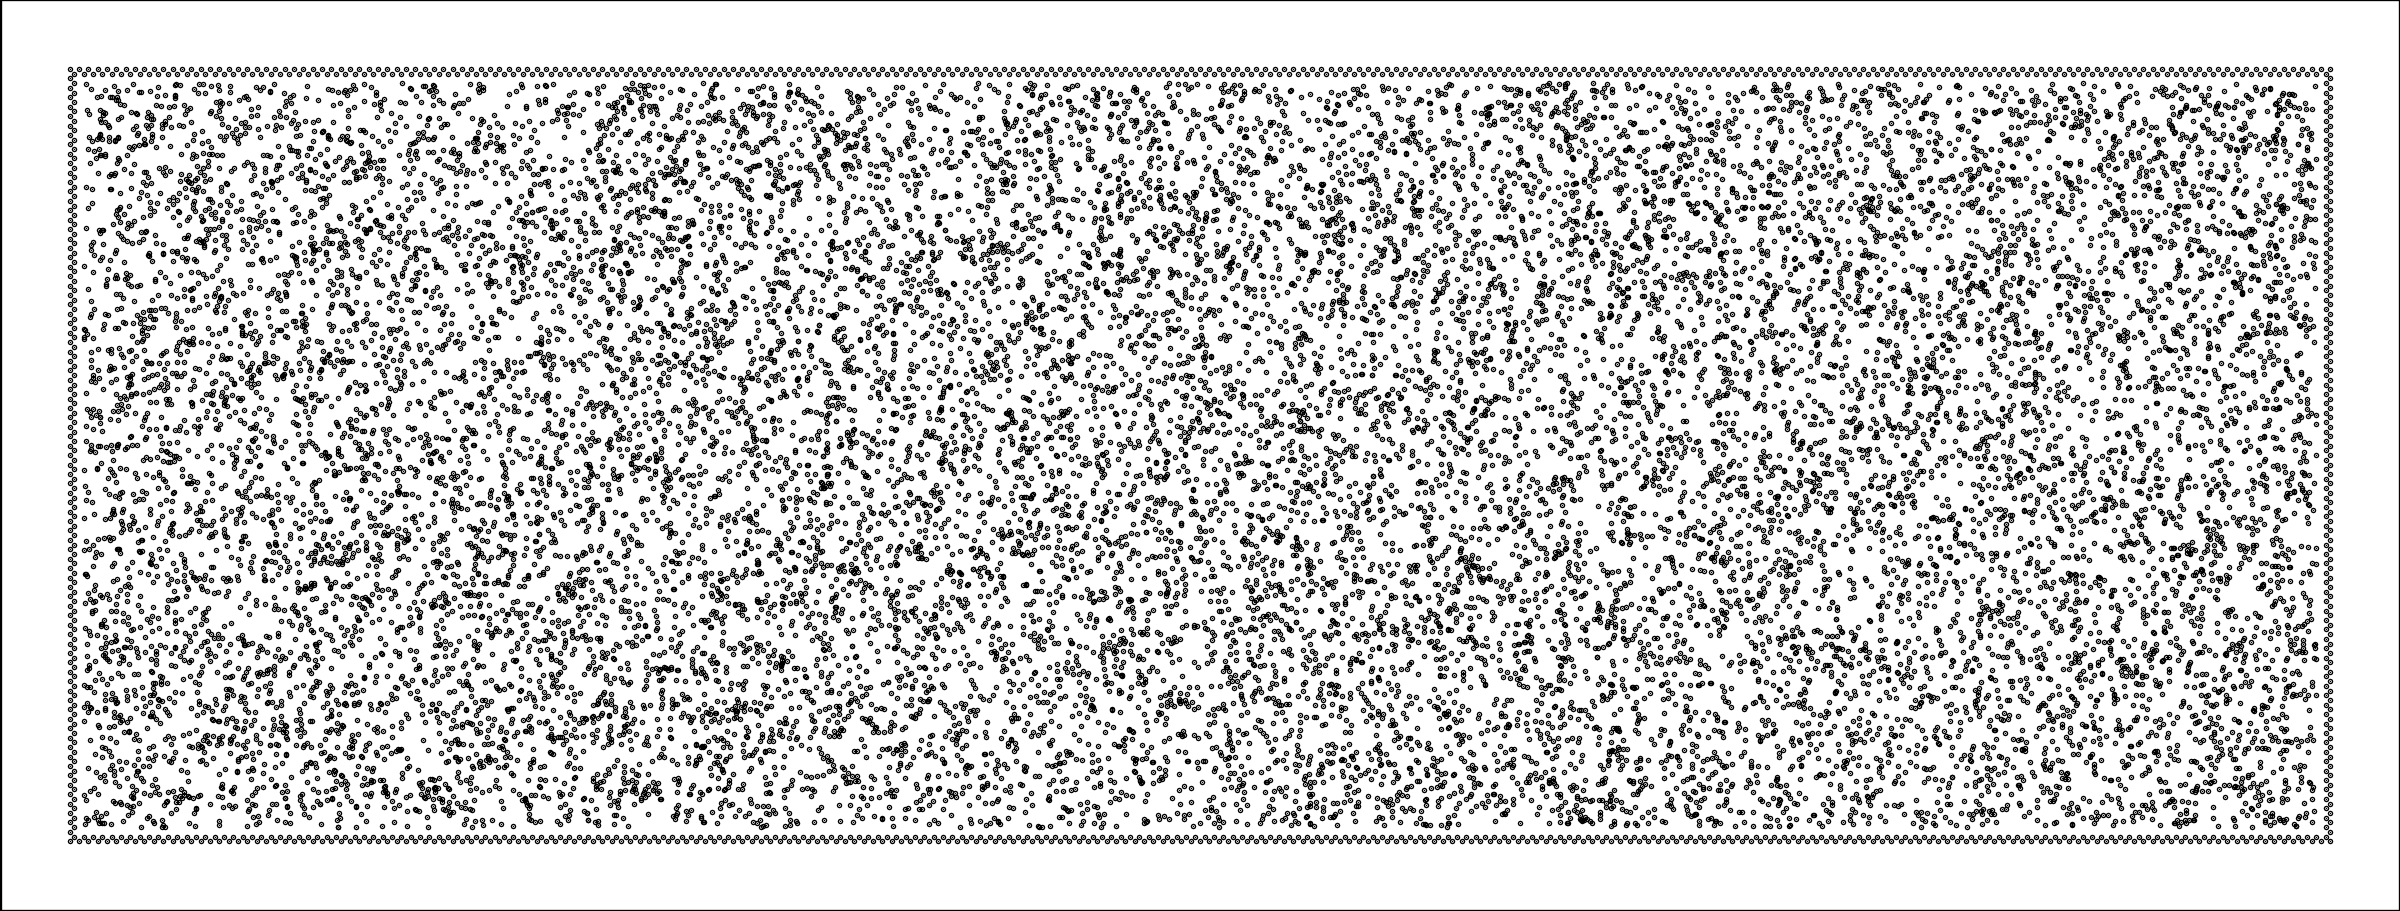

In [16]:
TopAdvec.SetPrintParameters(markersize = 0.1, dpi = 300, triplot = False)
TopAdvec.Plot(PlotLoop = False, Initial = True)

In [ ]:
TE, TE_err, Weights = TopAdvec.GetTopologicalEntropy()

In [ ]:
plt.plot(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()
plt.semilogy(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()

In [ ]:
print(TopAdvec.Domain)

In [ ]:
TopAdvec.ClearCurves()
TopAdvec.CurveGenerator.AddEllipse([2.5,0.0], 2.0, 0.5, phi = 0.0)

In [ ]:
TopAdvec.LoadCurves()

In [ ]:
TopAdvec.Plot(Initial = True)

In [ ]:
TopAdvec.EvolveLoop()

In [ ]:
TopAdvec.Plot(Initial = False)

In [ ]:
TopAdvec.ResetTri()
TopAdvec.EvolveTri(Delaunay = True)
TopAdvec.LoadCurves()
TopAdvec.EvolveLoop()

In [ ]:
TopAdvec.Plot(Initial = False)

In [ ]:
TopAdvec.ClearCurves()
#TopAdvec.CurveGenerator.AddEllipse([2.5,0.0], 2.0, 0.5, phi = 0.0)
#TopAdvec.CurveGenerator.AddCircle([2.5,0.0], 0.5)
#TopAdvec.CurveGenerator.AddRectangle([3.0,0.0], 4.0, 1.0, phi = 0.0)
#TopAdvec.CurveGenerator.AddSquare([3.0,0.0], 1.5, phi = np.pi/4)
#TopAdvec.CurveGenerator.AddVerticalLine(x_val = 2.1)
#TopAdvec.CurveGenerator.AddHorizontalLine(y_val = 0.1)
#TopAdvec.CurveGenerator.AddLineSegment([0.7,0.2], [4.6,-0.2])
x_pts = np.linspace(0.4, 5.1,100)
y_pts = 0.6*np.sin(4*x_pts)
points = np.array([x_pts,y_pts]).T
TopAdvec.CurveGenerator.AddOpenCurve(points)
#TopAdvec.CurveGenerator.AddClosedCurve(points)
TopAdvec.LoadCurves()
TopAdvec.Plot(Initial = True)

In [ ]:
TopAdvec.MovieFigures(PlotLoop = False, Delaunay = False)

In [ ]:
#ffmpeg -r 24 -pattern_type glob -i '*.png'  -vcodec libx264 -crf 25 -pix_fmt yuv420p DelaunayTriangulation.mp4

In [20]:
TopAdvec.ClearCurves()
TopAdvec.CurveGenerator.AddHorizontalLine(y_val = 0.01)
#TopAdvec.CurveGenerator.AddLineSegment([0.2,0.0], [5.0,0.0])
TopAdvec.LoadCurves()

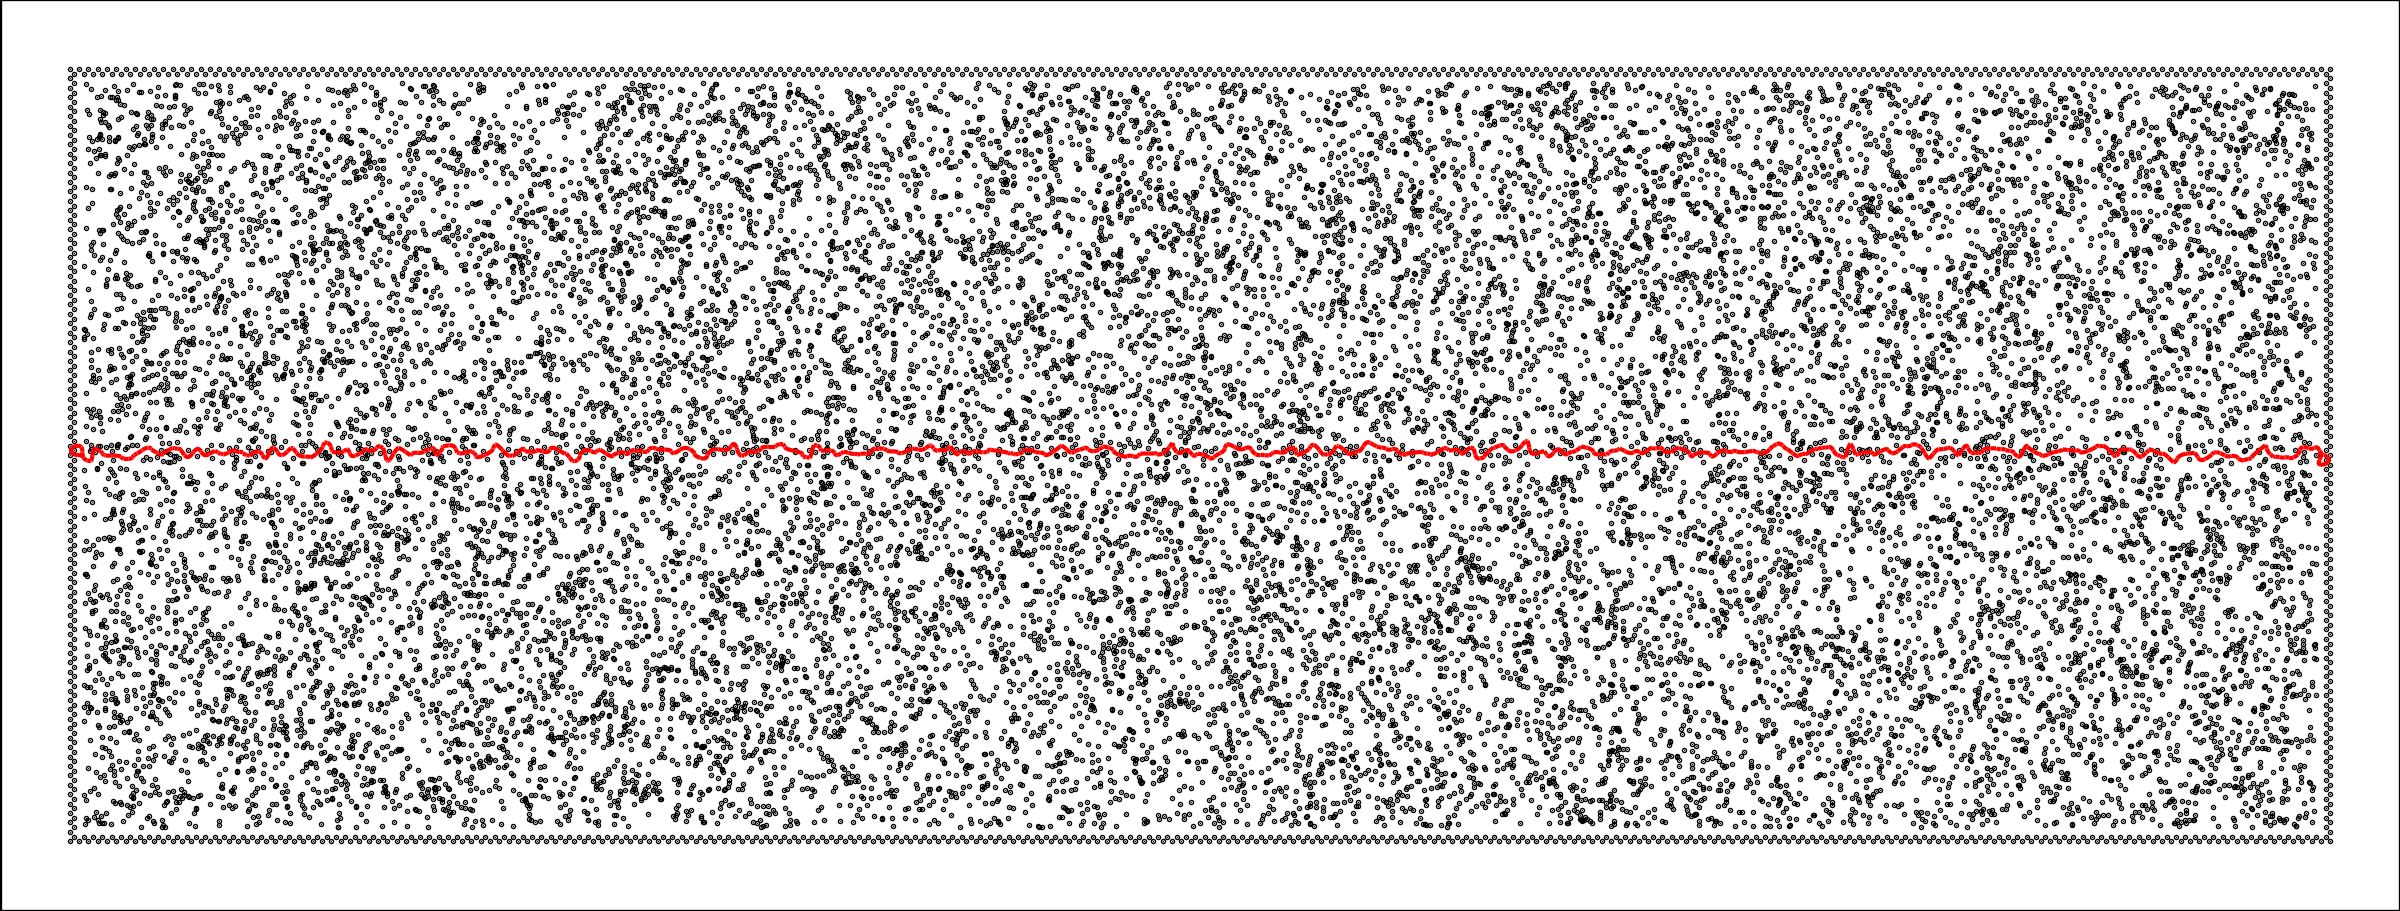

In [21]:
TopAdvec.Plot(PlotLoop = True, Initial = True)

In [22]:
TopAdvec.MovieFigures(PlotLoop = True, Delaunay = True)